## DNN model using FAMD
*Summary:* In this notebook, we train a DNN model using Factorial Analysis of Mixed Data to select features.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

train = pd.read_csv("../dataset/UNSW_NB15_training-set.csv")
test = pd.read_csv("../dataset/UNSW_NB15_testing-set.csv")

In [2]:
df = pd.concat([train, test]).reset_index(drop=True)
attack_cat_df = df['attack_cat']
df = df.drop(columns=['id', 'attack_cat', 'label'], axis=1)

# get numeric column names without label column
num_cols = df._get_numeric_data().columns

# subract numeric columns from all columns to get categorical columns 
cat_cols = list(set(df.columns) - set(num_cols))

print(f"Numerical features: {len(num_cols)}\nCategorical features: {len(cat_cols)}")

Numerical features: 39
Categorical features: 3


In [4]:
from sklearn.preprocessing import StandardScaler

# standard scale numerical features
scl = StandardScaler()
df[num_cols] = scl.fit_transform(df[num_cols])

df

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports
0,-0.208678,udp,-,INT,-0.130765,-0.165331,-0.046480,-0.098409,-0.002151,0.722026,...,-0.617890,-0.519345,-0.520051,-0.568574,-0.110419,-0.110372,-0.193597,-0.690790,-0.654825,-0.120335
1,-0.208679,udp,-,INT,-0.130765,-0.165331,-0.039194,-0.098409,0.210460,0.722026,...,-0.617890,-0.519345,-0.520051,-0.568574,-0.110419,-0.110372,-0.193597,-0.690790,-0.654825,-0.120335
2,-0.208679,udp,-,INT,-0.130765,-0.165331,-0.043188,-0.098409,0.678204,0.722026,...,-0.617890,-0.519345,-0.520051,-0.478652,-0.110419,-0.110372,-0.193597,-0.690790,-0.562869,-0.120335
3,-0.208679,udp,-,INT,-0.130765,-0.165331,-0.044155,-0.098409,0.470318,0.722026,...,-0.495547,-0.396808,-0.520051,-0.478652,-0.110419,-0.110372,-0.193597,-0.571689,-0.562869,-0.120335
4,-0.208678,udp,-,INT,-0.130765,-0.165331,-0.037100,-0.098409,0.054546,0.722026,...,-0.495547,-0.396808,-0.520051,-0.478652,-0.110419,-0.110372,-0.193597,-0.571689,-0.562869,-0.120335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257668,-0.208678,udp,dns,INT,-0.130765,-0.165331,-0.048678,-0.098409,0.123841,0.722026,...,2.196002,2.299004,1.537738,1.409713,-0.110419,-0.110372,-0.193597,2.048528,1.368213,-0.120335
257669,-0.124024,tcp,-,FIN,-0.071919,-0.093893,-0.045766,-0.095988,-0.568903,0.722026,...,-0.617890,-0.519345,-0.520051,-0.568574,-0.110419,-0.110372,-0.193597,-0.690790,-0.746782,-0.120335
257670,-0.208678,udp,dns,INT,-0.130765,-0.165331,-0.048678,-0.098409,0.123841,0.722026,...,-0.373204,-0.274271,-0.177086,0.420569,-0.110419,-0.110372,-0.193597,-0.452588,0.264738,-0.120335
257671,-0.208678,udp,dns,INT,-0.130765,-0.165331,-0.048678,-0.098409,0.123841,0.722026,...,2.930060,3.034226,1.709220,1.949245,-0.110419,-0.110372,-0.193597,2.763133,1.919951,-0.120335


In [3]:
from prince import FAMD

famd = FAMD(
    n_components=148,
    random_state=42,
    engine="sklearn"
)
famd = famd.fit(df)
famd = famd.transform(df)

In [4]:
famd

,0,1,2,3,4,5,6,7,8,9,...,138,139,140,141,142,143,144,145,146,147
0,-0.780727,0.694613,-0.030563,-0.081236,-0.194420,-0.209900,0.143733,0.002696,-0.077109,0.034576,...,0.001197,0.000850,-0.000775,0.000509,-0.000273,-0.003263,-0.001946,0.007659,-0.028079,0.014697
1,-0.836471,0.790647,-0.035094,-0.204939,-0.241937,-0.276541,0.108559,0.260451,-0.244747,0.100572,...,0.000510,0.002869,-0.000679,0.000897,-0.000444,-0.000421,-0.000907,0.006125,-0.027569,0.010040
2,-0.891194,0.774936,-0.033908,-0.202177,-0.207536,-0.288673,0.082568,0.142255,-0.162746,0.089996,...,0.001312,0.001469,-0.000399,0.000380,-0.000274,-0.000185,-0.000963,0.006000,-0.028496,0.007466
3,-0.872546,0.721492,-0.031901,-0.163140,-0.193368,-0.252207,0.092186,0.103038,-0.132542,0.065524,...,0.001245,0.001345,-0.000570,0.000457,-0.000264,-0.001278,-0.001279,0.006538,-0.028611,0.010759
4,-0.844570,0.755516,-0.034275,-0.211508,-0.241806,-0.255068,0.101258,0.328612,-0.280662,0.095672,...,0.000068,0.003643,-0.000898,0.001201,-0.000517,-0.000734,-0.000853,0.006329,-0.028225,0.012764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257668,-2.051171,-0.960659,0.032090,0.001377,0.225565,0.167805,-0.243664,0.069088,0.011192,-0.052141,...,0.001490,0.001995,-0.000538,0.000217,0.000203,0.001483,0.001901,0.001632,-0.003389,0.006286
257669,1.420816,0.085917,-0.012049,-0.211003,0.000026,-0.073159,-0.116174,-0.019866,-0.118639,-0.359840,...,0.002685,0.001703,-0.000537,-0.000007,-0.000478,0.000832,-0.005148,0.001267,-0.132379,0.048279
257670,-1.432738,-0.321533,0.010872,0.110764,-0.057674,-0.014126,0.110039,-0.056237,-0.071484,0.071126,...,0.000795,0.002077,-0.000516,0.000168,-0.000205,0.000654,0.000697,0.003318,0.004985,-0.006395
257671,-2.249081,-1.161582,0.038627,-0.037349,0.314478,0.226848,-0.355786,0.109113,0.039706,-0.094911,...,0.001682,0.001922,-0.000589,0.000286,0.000304,0.001394,0.002196,0.001640,-0.008050,0.011419


In [5]:
from sklearn.model_selection import train_test_split

y = pd.get_dummies(attack_cat_df)
X = famd

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=42)
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((172640, 148), (85033, 148), (172640, 10), (85033, 10))

### Tensorflow model

In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
plt.style.use('ggplot')
!pip install livelossplot
from livelossplot import PlotLossesKeras

In [7]:
model = keras.Sequential(
    [
        layers.Dense(256, activation='relu', input_dim=X_train.shape[1]),
        layers.Dense(128, activation='relu', use_bias=True),
        layers.Dense(128, activation='relu', use_bias=True),
        layers.Dense(128, activation='relu', use_bias=True),
        layers.Dense(128, activation='relu', use_bias=True),
        layers.Dense(10, activation='softmax', use_bias=True)
    ]
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               38144     
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 128)               16512     
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 121,866
Trainable params: 121,866
Non-trai

In [8]:
model.compile('adam', loss='categorical_crossentropy', metrics='accuracy')

monitor_val_acc = EarlyStopping(monitor='loss', patience=10)
callbacks=[PlotLossesKeras()]

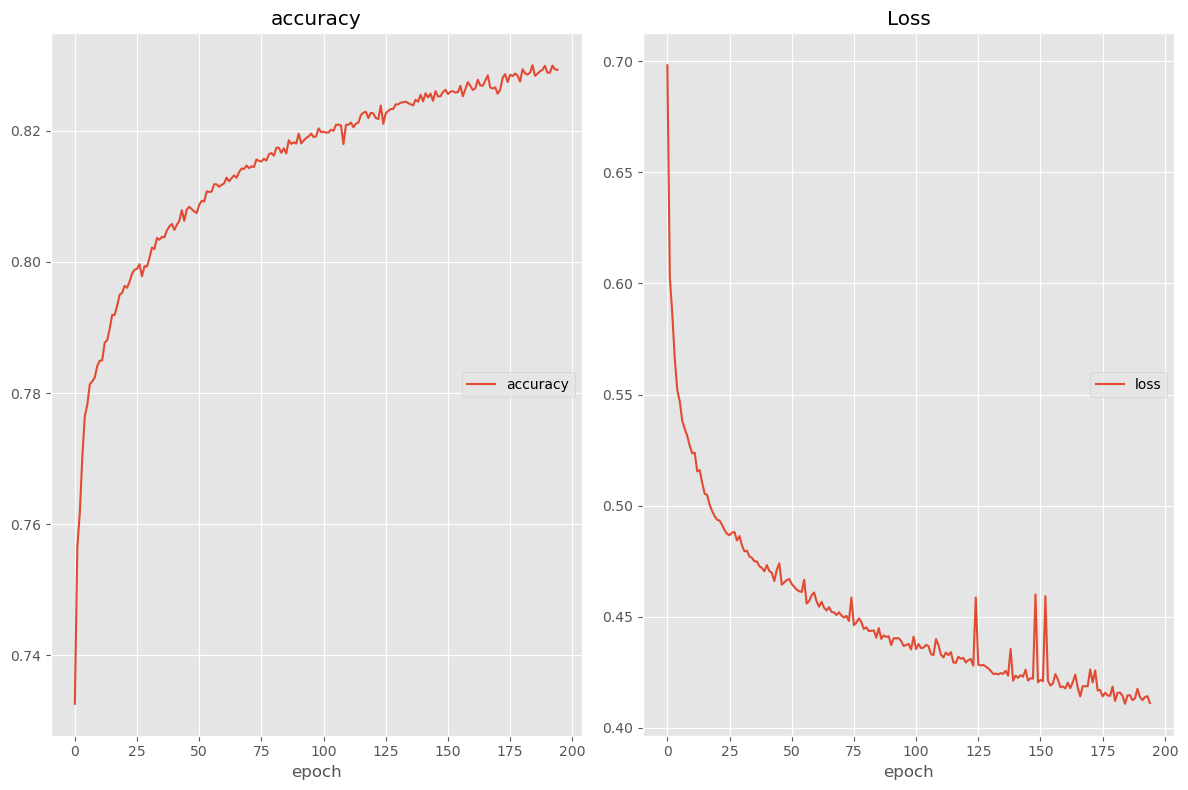

accuracy
	accuracy         	 (min:    0.733, max:    0.830, cur:    0.829)
Loss
	loss             	 (min:    0.411, max:    0.698, cur:    0.411)


In [9]:
model.fit(X_train, y_train, epochs=1000, batch_size=128, callbacks=[PlotLossesKeras(), monitor_val_acc], shuffle=1000, verbose=0)

In [10]:
model.evaluate(X_test, y_test)

2658/2658 [==============================] - 3s 1ms/step - loss: 0.5202 - accuracy: 0.8132


[0.5201529264450073, 0.8132137060165405]